In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
df = pd.read_excel('subscription_churn_100k_full.xlsx')

In [7]:
df.head()

,user_id,signup_date,last_active_date,plan_type,monthly_fee,tenure_months,avg_session_per_week,support_tickets,is_auto_renew,country,payment_failed,churned
0,987232,2019-01-28,2019-02-09,Premium,19.99,75,2.7,2,1,Canada,1,1
1,79955,2022-11-22,2023-02-06,Basic,9.99,28,0.0,0,1,France,0,0
2,567131,2023-08-27,2023-12-02,Standard,14.99,19,3.6,0,1,India,0,0
3,500892,2022-07-16,2022-10-12,Basic,9.99,33,3.1,0,1,Japan,0,0
4,55400,2020-12-30,2021-01-25,Basic,9.99,51,5.0,0,1,UK,0,0


In [8]:
df.columns

Index(['user_id', 'signup_date', 'last_active_date', 'plan_type',
       'monthly_fee', 'tenure_months', 'avg_session_per_week',
       'support_tickets', 'is_auto_renew', 'country', 'payment_failed',
       'churned'],
      dtype='object')

| Column Name          | Data Type   | Description                                                  |
|:---------------------|:------------|:-------------------------------------------------------------|
| user_id              | Integer     | Unique identifier for each user (1 to 100,000)             |
| signup_date          | Date        | Date when the user signed up for the service                 |
| last_active_date     | Date        | Most recent date the user was active on the platform         |
| plan_type            | Categorical | Subscription plan: Basic, Standard, or Premium               |
| monthly_fee          | Float       | Monthly cost of the user's plan (based on plan_type)         |
| tenure_months        | Integer     | Number of months since the user signed up                    |
| avg_session_per_week | Float       | Average number of sessions per week by the user (0–14 range) |
| support_tickets      | Integer     | Total number of support tickets the user has submitted       |
| is_auto_renew        | Binary      | Whether the subscription is auto-renewing: 1 = Yes, 0 = No   |
| country              | Categorical | Country of the user (10 major countries simulated)           |
| payment_failed       | Integer     | Number of failed payment attempts                            |
| churned              | Binary      | Target variable: 1 = User churned, 0 = User active           |


In [11]:
df.isnull().sum()

user_id                 0
signup_date             0
last_active_date        0
plan_type               0
monthly_fee             0
tenure_months           0
avg_session_per_week    0
support_tickets         0
is_auto_renew           0
country                 0
payment_failed          0
churned                 0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               100000 non-null  int64  
 1   signup_date           100000 non-null  object 
 2   last_active_date      100000 non-null  object 
 3   plan_type             100000 non-null  object 
 4   monthly_fee           100000 non-null  float64
 5   tenure_months         100000 non-null  int64  
 6   avg_session_per_week  100000 non-null  float64
 7   support_tickets       100000 non-null  int64  
 8   is_auto_renew         100000 non-null  int64  
 9   country               100000 non-null  object 
 10  payment_failed        100000 non-null  int64  
 11  churned               100000 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 9.2+ MB


In [13]:
df[(df.duplicated)]

,user_id,signup_date,last_active_date,plan_type,monthly_fee,tenure_months,avg_session_per_week,support_tickets,is_auto_renew,country,payment_failed,churned


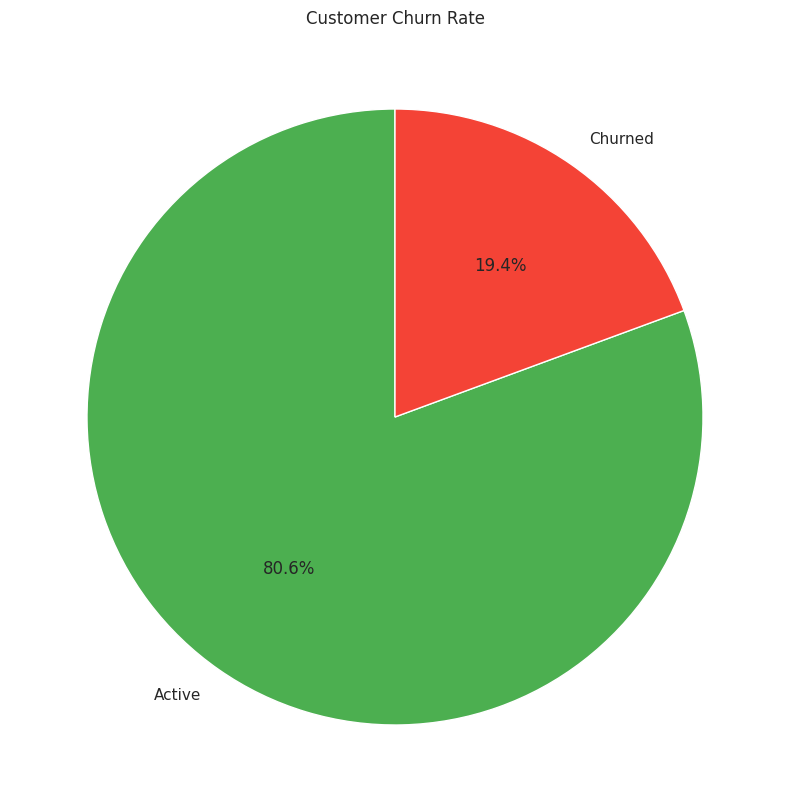

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

#Pie Chart
plt.figure(figsize=(10, 10))
df['churned'].value_counts().plot.pie(
    labels=["Active", "Churned"],
    autopct="%1.1f%%",
    colors=["#4CAF50", "#F44336"],
    startangle=90
)
plt.title("Customer Churn Rate")
plt.ylabel("")
plt.show()

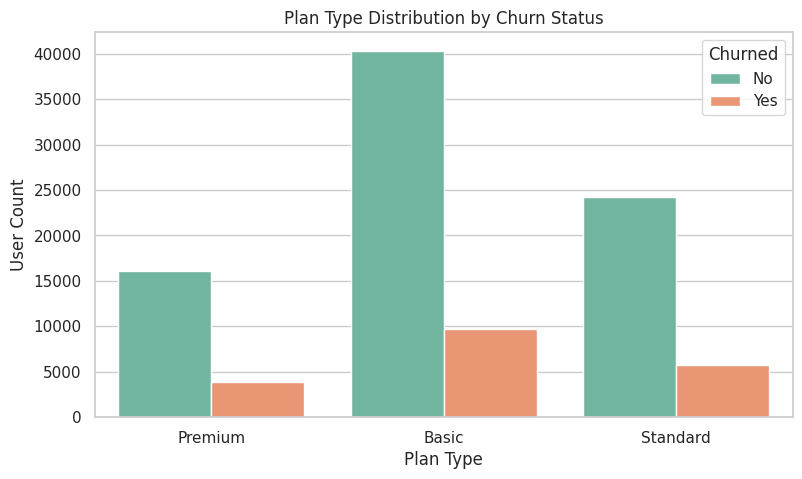

In [19]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x="plan_type", hue="churned", palette="Set2")
plt.title("Plan Type Distribution by Churn Status")
plt.xlabel("Plan Type")
plt.ylabel("User Count")
plt.legend(title="Churned", labels=["No", "Yes"])
plt.show()


/tmp/ipykernel_7122/2868912959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="churned", y="avg_session_per_week", palette="coolwarm")


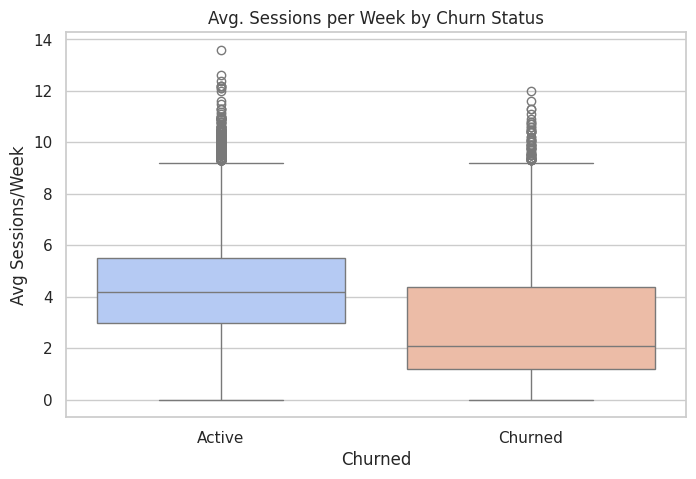

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="churned", y="avg_session_per_week", palette="coolwarm")
plt.title("Avg. Sessions per Week by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Avg Sessions/Week")
plt.xticks([0, 1], ["Active", "Churned"])
plt.show()

/tmp/ipykernel_7122/1760870896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="churned", y="payment_failed", palette="YlOrRd")


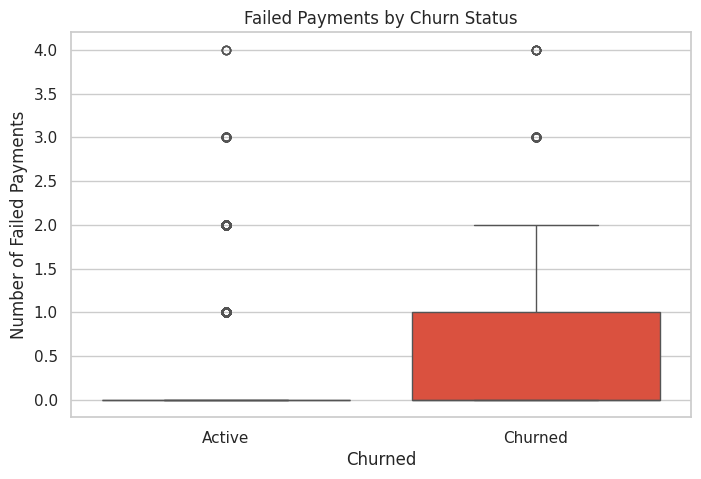

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="churned", y="payment_failed", palette="YlOrRd")
plt.title("Failed Payments by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Number of Failed Payments")
plt.xticks([0, 1], ["Active", "Churned"])
plt.show()

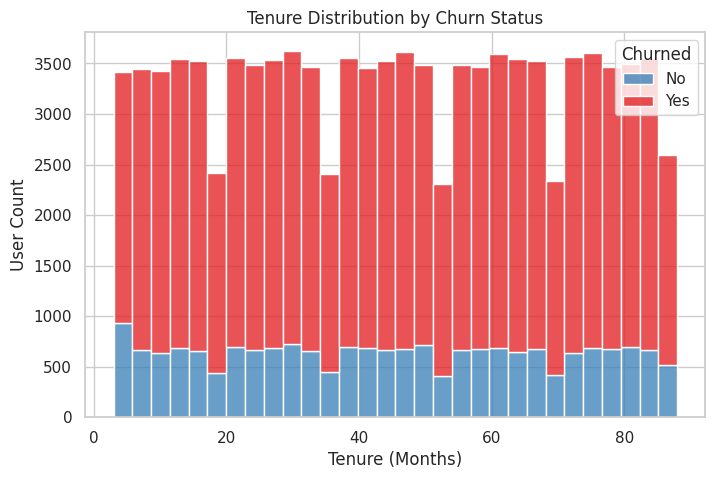

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="tenure_months", hue="churned", multiple="stack", bins=30, palette="Set1")
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("User Count")
plt.legend(title="Churned", labels=["No", "Yes"])
plt.show()

In [24]:
df_model = df.drop(columns=["user_id", "signup_date", "last_active_date"])

label_encoders = {}
for col in ["plan_type", "country"]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

In [25]:
df_model.head()

,plan_type,monthly_fee,tenure_months,avg_session_per_week,support_tickets,is_auto_renew,country,payment_failed,churned
0,1,19.99,75,2.7,2,1,2,1,1
1,0,9.99,28,0.0,0,1,3,0,0
2,2,14.99,19,3.6,0,1,5,0,0
3,0,9.99,33,3.1,0,1,6,0,0
4,0,9.99,51,5.0,0,1,8,0,0


In [26]:
# Features and target
X = df_model.drop(columns=["churned"])
y = df_model["churned"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

/tmp/ipykernel_7122/3943829056.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:5], y=feature_names[indices][:5], palette="viridis")


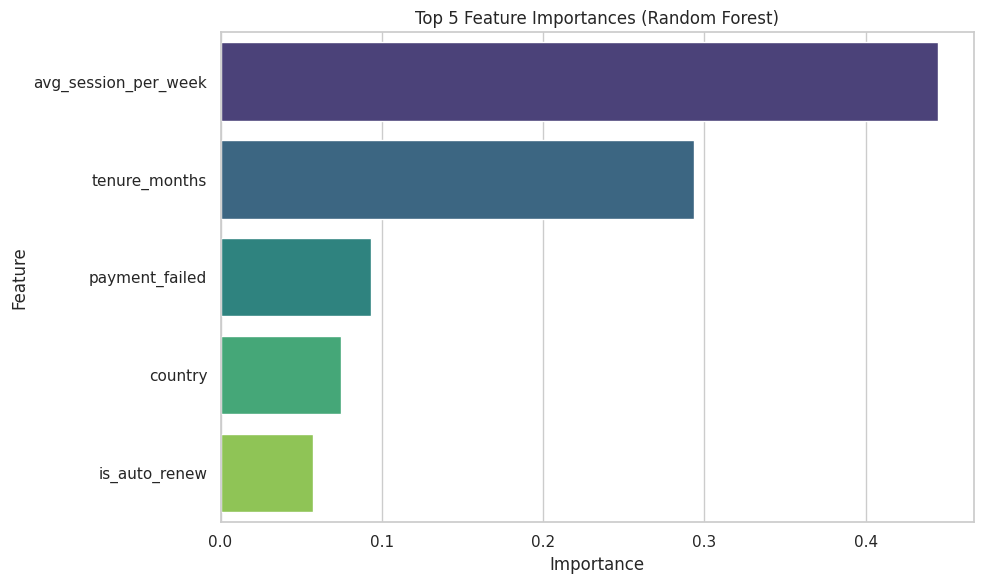

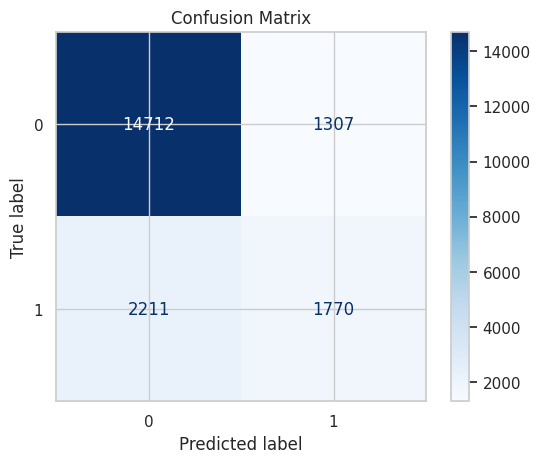

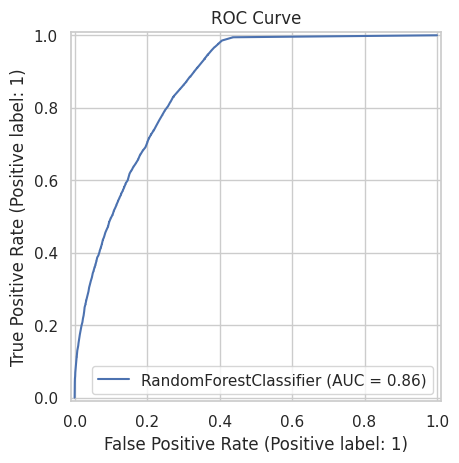

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import numpy as np

# 1. Feature Importance Plot
importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:5], y=feature_names[indices][:5], palette="viridis")
plt.title("Top 5 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve")
plt.show()




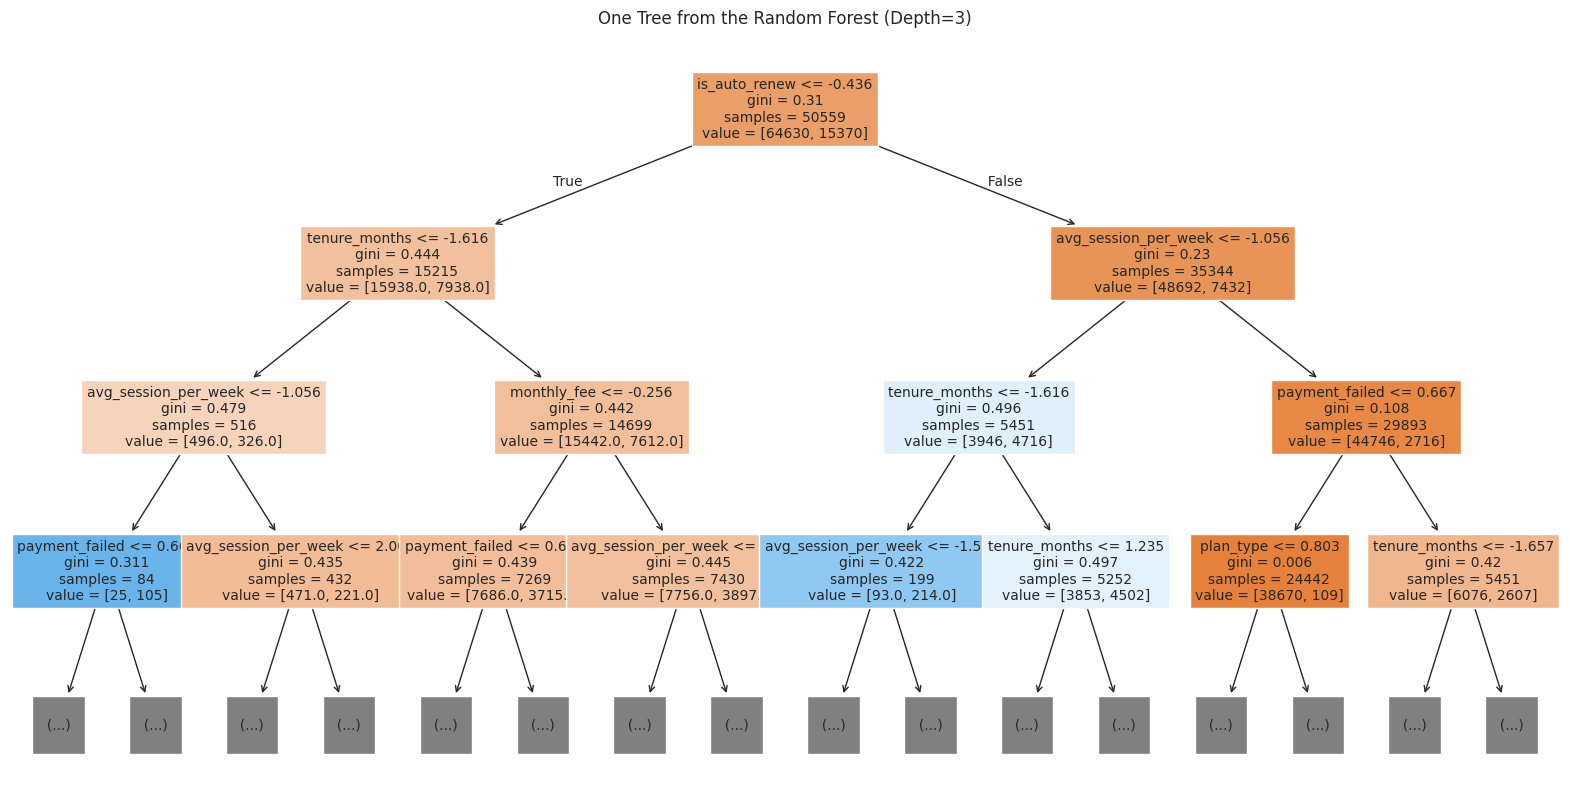

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=feature_names, filled=True, max_depth=3, fontsize=10)
plt.title("One Tree from the Random Forest (Depth=3)")
plt.show()

In [32]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

In [33]:
from sklearn.metrics import roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     16019
           1       0.58      0.44      0.50      3981

    accuracy                           0.82     20000
   macro avg       0.72      0.68      0.70     20000
weighted avg       0.81      0.82      0.82     20000

Confusion Matrix:
 [[14712  1307]
 [ 2211  1770]]
ROC AUC Score: 0.8622290623579552


In [35]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     16019
           1       0.67      0.34      0.45      3981

    accuracy                           0.83     20000
   macro avg       0.76      0.65      0.68     20000
weighted avg       0.82      0.83      0.81     20000

Confusion Matrix:
 [[15355   664]
 [ 2642  1339]]
ROC AUC Score: 0.8351505517993665
